## PRACTICE PROJECT

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

### IMPORT THE DATASET

In [174]:
df = pd.read_csv("/Users/cansezgin/Python-Output/Medical_insurance.csv")

In [176]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [178]:
# Rename the 'sex' column to 'gender'
df.rename(columns={'sex': 'gender'}, inplace=True)

In [180]:
df.head(10)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [182]:
df.replace('?', np.nan, inplace = True)

### DATA WRANGLING

In [185]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   gender    2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
None


Handle missing data:
- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using df.info().

In [190]:
# smoker is a cathegorical attribute, replace with frequent entry

# Get most frequent value in 'smoker' column
is_smoker = df['smoker'].value_counts().idxmax()

# Replace NaN values in 'smoker' with the most frequent value
df['smoker'].replace(np.nan, is_smoker, inplace=True)

/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_1616/3624396146.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace(np.nan, is_smoker, inplace=True)


In [192]:
# age is a continuous variable, replace with mean age

# Get the mean value in 'age' column
mean_age = df['age'].astype('float').mean(axis=0)

# Replace NaN values in 'age' with the mean value
df["age"].replace(np.nan, mean_age, inplace=True)

/var/folders/ls/jfgzf4j13hx__mtdgv2_0xbw0000gn/T/ipykernel_1616/1317184997.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].replace(np.nan, mean_age, inplace=True)


In [194]:
# ensure lowecase before mapping

df['gender'] = df['gender'].str.lower()
df['smoker'] = df['smoker'].str.lower()
df['region'] = df['region'].str.lower()

In [196]:
# Apply the specified mappings
df['gender'] = df['gender'].map({'female': 1, 'male': 2})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 2})
df['region'] = df['region'].map({
    'northwest': 1,
    'northeast': 2,
    'southwest': 3,
    'southeast': 4
})

In [198]:
df[["age", "smoker"]] = df[["age", "smoker"]].astype("int")

In [200]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   gender    2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


In [202]:
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())

   age  gender     bmi  children  smoker  region   charges
0   19       1  27.900         0       1       3  16884.92
1   18       2  33.770         1       2       4   1725.55
2   28       2  33.000         3       2       4   4449.46
3   33       2  22.705         0       2       1  21984.47
4   32       2  28.880         0       2       1   3866.86


### EXPLORATORY DATA ANALYSIS

(0.0, 66902.85800000001)

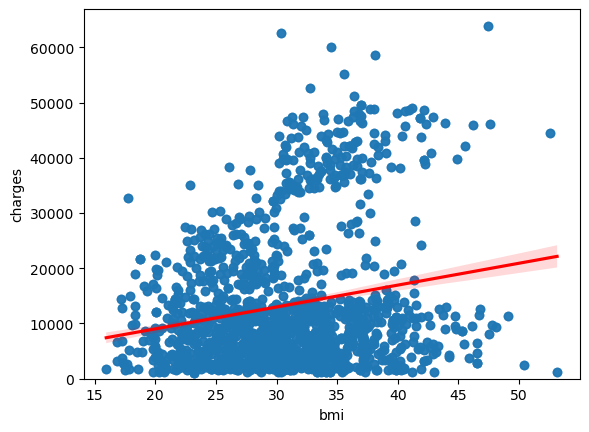

In [205]:
# Implement the regression plot for charges with respect to bmi.

sns.regplot(x="bmi", y="charges", data=df, line_kws={"color":"red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

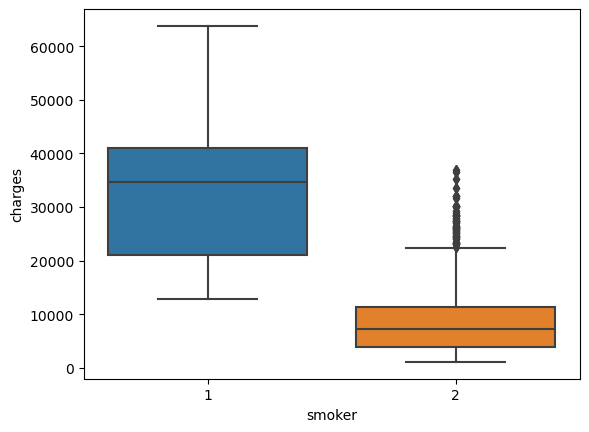

In [207]:
# Implement the box plot for charges with respect to smoker.

sns.boxplot(x="smoker", y="charges", data=df)

In [209]:
# Print the correlation matrix for the dataset.

print(df.corr())

               age    gender       bmi  children    smoker    region   charges
age       1.000000 -0.026046  0.113048  0.037574  0.023286 -0.007167  0.298624
gender   -0.026046  1.000000  0.042924  0.016020 -0.082326  0.022213  0.062837
bmi       0.113048  0.042924  1.000000 -0.001492 -0.011489  0.271119  0.199846
children  0.037574  0.016020 -0.001492  1.000000 -0.006362 -0.025717  0.066442
smoker    0.023286 -0.082326 -0.011489 -0.006362  1.000000 -0.054077 -0.788783
region   -0.007167  0.022213  0.271119 -0.025717 -0.054077  1.000000  0.054058
charges   0.298624  0.062837  0.199846  0.066442 -0.788783  0.054058  1.000000


### MODEL DEVELOPMENT

In [216]:
# Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the R2 score of this model.

X = df[['smoker']]
Y = df['charges']

lm = LinearRegression()
lm.fit(X,Y)

print(lm.score(X,Y))

0.6221791733924185


In [222]:
# Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the R2 score of this model. You should see an improvement in the performance.

# definition of Y and lm remain same as used in last cell.

Z = df[["age","gender","bmi","children","smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z,Y))

0.7504083820289634


In [228]:
# Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

# Y and Z use the same values as defined in previous cells

Input = [('Scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),
         ('model',LinearRegression())]

pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)
print(r2_score(Y,ypipe))

0.8452290218378298


### MODEL REFINEMENT

In [231]:
# Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

# Z and Y hold same values as in previous cells

x_train, x_test, y_train, y_test = train_test_split(Z,Y,test_size=0.2, random_state=1)

In [233]:
# Initialize a Ridge regressor that used hyperparameter 𝛼 = 0.1. Fit the model using training data data subset. Print the R2 score for the testing data.

# x_train, x_test, y_train, y_test hold same values as in previous cells

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582406


In [235]:
# Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the R2 score for the testing subset.

# x_train, x_test, y_train, y_test hold same values as in previous cells

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr,y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7835889701996002
